# Project by:

- Filippo Teodoro: b00772555@essec.edu
- Piero Ronchetti: b00782314@essec.edu
- Lorenzo Lo Faso: b00784982@essec.edu

# **Backgorund**

Mounting the notebook on the drive to provide a local folder where to download the data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Local path:
# /content/drive/MyDrive/Colab_Notebooks/Assignment_Folder/Python_Assignment.ipynb

Mounted at /content/drive


Importing all the necessary libraries to analyze data and plot graphs

In [ ]:
import pandas as pd
import time
import datetime
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
# plt.style.use('dark_background')

Downloading the data from the websites in .csv format, making sure the header and index are correctly displayed

In [ ]:
stoxx = pd.read_csv('https://www.stoxx.com/document/Indices/Current/HistoricalData/hbrbcpe.txt',
                    header=3, sep=';', error_bad_lines=False, warn_bad_lines=False)

# Correct formatting for storing the data
stoxx.set_index(stoxx.columns[0], inplace=True)
stoxx.index.name = 'Date'

# Cleaning: Removing unwanted blank spaces
stoxx.rename(columns=lambda x: x.strip(), inplace=True)

#Checking the data is in the correct format
if stoxx.shape[1] != 8:
  print('Number of columns is different than expected')
elif not pd.to_datetime(stoxx.index, format='%d.%m.%Y', errors='coerce').notnull().all():
  print('Data format is not consistent')
else: 
  print('Data is ok')

Data is ok


Displaying the first 5 rows the STOXX dataframe

In [ ]:
stoxx.head()

,SX5P,SX5E,SXXP,SXXE,SXXF,SXXA,DK5F,DKXF
Date,,,,,,,,
31.12.1986,775.00,900.82,82.76,98.58,98.06,69.06,645.26,65.56
01.01.1987,775.00,900.82,82.76,98.58,98.06,69.06,645.26,65.56
02.01.1987,770.89,891.78,82.57,97.80,97.43,69.37,647.62,65.81
05.01.1987,771.89,898.33,82.82,98.60,98.19,69.16,649.94,65.82
06.01.1987,775.92,902.32,83.28,99.19,98.83,69.50,652.49,66.06


Plotting STOXX 50



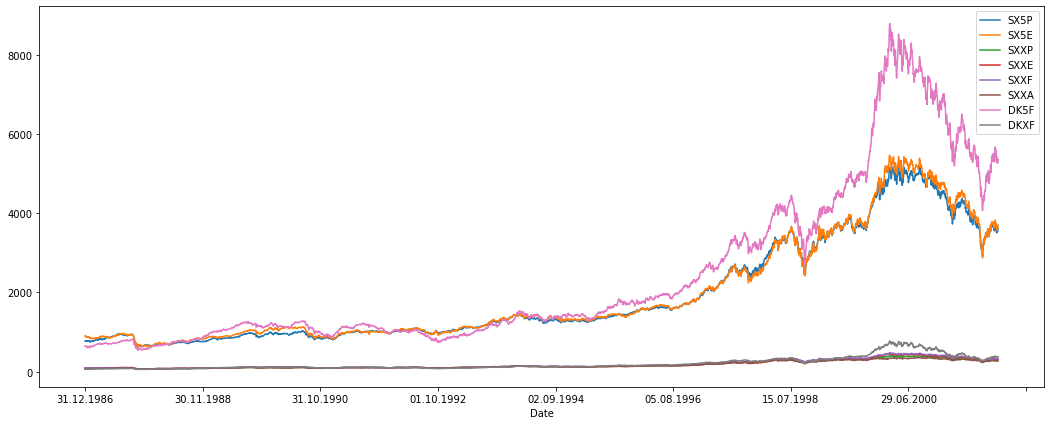

In [ ]:
pltsize = (18, 7)
stoxx.plot(figsize = pltsize)

Downloading the data from the websites in .csv format, making sure the header and index are correctly displayed

In [ ]:
vstoxx = pd.read_csv('https://www.stoxx.com/document/Indices/Current/HistoricalData/h_vstoxx.txt',
                     header=2)
#setting the correct index to date
vstoxx.set_index('Date', inplace=True)

#Checking the data is in the correct format
if vstoxx.shape[1] != 9:
  print('Number of columns is different than expected')
elif not pd.to_datetime(vstoxx.index, format='%d.%m.%Y', errors='coerce').notnull().all():
  print('Data format is not consistent')
else: 
  print('Data is ok')

Data is ok


Displaying first 5 rows of the VSTOXX dataframe

In [ ]:
vstoxx.head()

,V2TX,V6I1,V6I2,V6I3,V6I4,V6I5,V6I6,V6I7,V6I8
Date,,,,,,,,,
04.01.1999,18.2033,21.2458,17.5555,31.2179,33.3124,33.7327,33.2232,31.8535,23.8209
05.01.1999,29.6912,36.6400,28.4274,32.6922,33.7326,33.1724,32.8457,32.2904,25.0532
06.01.1999,25.1670,25.4107,25.1351,32.2186,32.6459,31.9673,32.9260,33.2871,26.0107
07.01.1999,32.5205,35.4410,32.2004,36.1265,34.5150,33.1095,33.2843,33.7269,26.2205
08.01.1999,33.2296,35.8846,33.0020,36.0813,36.3964,33.4658,33.4837,33.9227,26.3672


Plotting VSTOXX 50

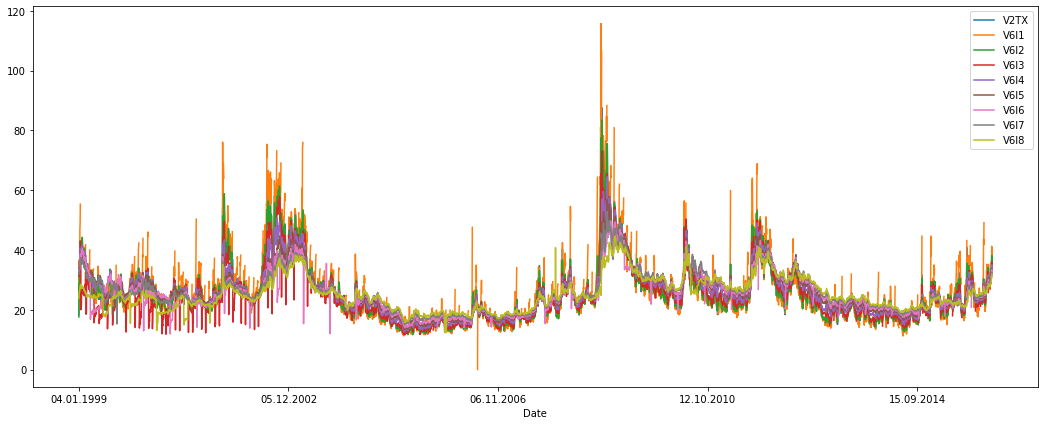

In [ ]:
vstoxx.plot(figsize = pltsize)

*Merging* the two tables (stock prices, volatility) using the common index (date) creating a unique time series 

In [ ]:
# Inner merging stoxx and vstoxx to remove all lines not shared among the two datasets filtering only the SX5E and V2TX columns as requested
stoxxvstoxx = pd.merge(stoxx['SX5E'], vstoxx['V2TX'], left_index=True, right_index=True)

# Inner merging stoxx and vstoxx to remove all lines not shared among the two datasets without filters
fullmerge = pd.merge(stoxx, vstoxx, left_index=True, right_index=True)

# Replacing missing / not numerical values with a random "U"  
# stoxxvstoxx = stoxxvstoxx.replace(np.NaN, 'U')
# fullmerge = fullmerge.replace(np.NaN, 'U')

# Removing "faulty rows" with blanks or not numerical values
stoxxvstoxx = stoxxvstoxx.dropna()
fullmerge = fullmerge.dropna()

# Check number of rows
stoxxvstoxx.count() # 760
# fullmerge.count() # 688

SX5E    760
V2TX    760
dtype: int64

Displaying the last five rows of merged dataframe

In [ ]:
#fullmerge.tail()
stoxxvstoxx.tail()

,SX5E,V2TX
Date,,
17.12.2001,3692.85,27.7752
18.12.2001,3680.55,28.4894
19.12.2001,3651.51,28.3782
20.12.2001,3617.47,29.0028
21.12.2001,3696.44,28.5525


Plotting the graphs of the two time series combined, X axis Date, Y axis Indexes prices / volatility

**Time series comment**

We can observe from the graph that the Euro STOXX 50 Index and actual EURO STOXX 50 Index volatility value differ in scale, 
Big changes (jumps) in index prices should produce high volatility values.
For example, we observe in September 2001 (most probably at the very date of the 11/09 terrorist attack) the sharpest drop in stock prices
This is reflected by a sharp increase in volatility index value


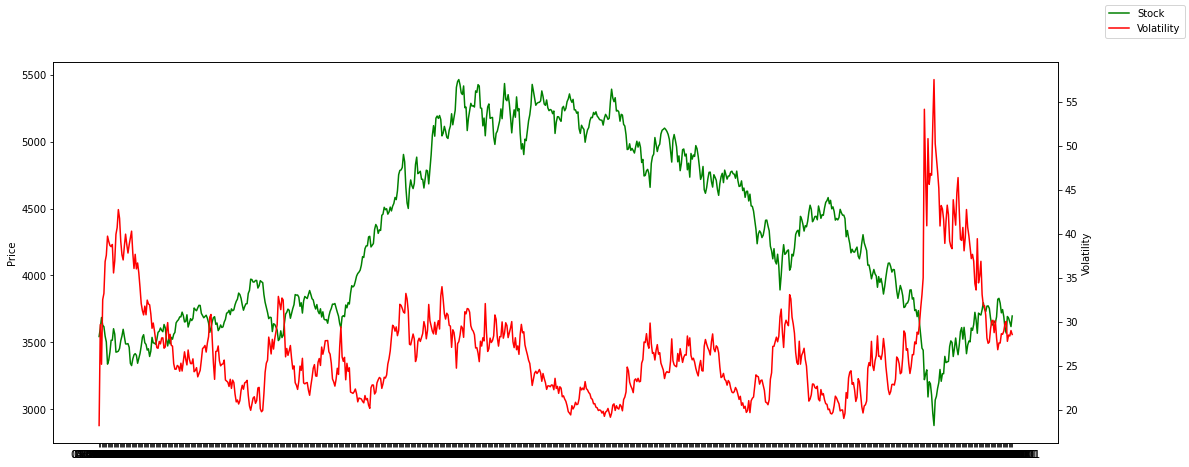

In [ ]:
# IMPORTANT: this cell shall be run 2 or more times to show properly

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

#plotting the two selected indexes from the list
sx5e = ax1.plot(stoxxvstoxx.index, stoxxvstoxx['SX5E'], label='Stock', color='g')
v2tx = ax2.plot(stoxxvstoxx.index, stoxxvstoxx['V2TX'], label='Volatility', color='r')

#labelling axes
ax1.set_ylabel('Price')
ax2.set_ylabel('Volatility')

#setting the graph's size
plt.rcParams["figure.figsize"] = pltsize
fig.legend()
plt.show()

##Scheduling the download

To use when delivering the project, interrupt cell to proceed when testing

In [ ]:
# Functions that were explained before are not commented here

while True:
  # Downloading around 8 local time as specified in the assignment
  
  if datetime.datetime.utcnow().hour == 0: # 08:00 SGT = 00:00 UTC

    # Fetch current time to make sure that the data is named correctly, as requested by the manager, with corresponding date/timestamp
    date = str(datetime.datetime.now())

    # Contrust a string variable to use in the name of the file
    timestamp = ''.join(([n for n in date if n.isdigit()]))[:14]

    stoxx = pd.read_csv('https://www.stoxx.com/document/Indices/Current/HistoricalData/hbrbcpe.txt',
                    header=3, sep=';', error_bad_lines=False, warn_bad_lines=False)
  
    stoxx.set_index(stoxx.columns[0], inplace=True)
    stoxx.index.name = 'Date'
    stoxx.rename(columns=lambda x: x.strip(), inplace=True)
    
    if stoxx.shape[1] != 8:
      print('Number of columns is different than expected')
      break
    elif not pd.to_datetime(vstoxx.index, format='%d.%m.%Y', errors='coerce').notnull().all():
      print('Data format is not consistent')
      break
    else: 
      print('Data is ok')
      break

    # Save data frame in local folder with custom name
    stoxxname = 'stoxx' + timestamp + '.csv'
    stoxx.to_csv('/content/drive/MyDrive/Colab_Notebooks/Assignment_Folder/' + str(stoxxname))

    vstoxx = pd.read_csv('https://www.stoxx.com/document/Indices/Current/HistoricalData/h_vstoxx.txt',
                     header=2)
    vstoxx.set_index('Date', inplace=True)

    if vstoxx.shape[1] != 9:
      print('Number of columns is different than expected')
      break
    elif not pd.to_datetime(vstoxx.index, format='%d.%m.%Y', errors='coerce').notnull().all():
      print('Data format is not consistent')
      break
    else: 
      print('Data is ok')
      break

    # Save data frame in local folder with custom name
    vstoxxname = 'vstoxx' + timestamp + '.csv'
    vstoxx.to_csv('/content/drive/MyDrive/Colab_Notebooks/Assignment_Folder/' + str(vstoxxname))

    stoxxvstoxx = pd.merge(stoxx['SX5E'], vstoxx['V2TX'], left_index=True, right_index=True)

    fullmerge = pd.merge(stoxx, vstoxx, left_index=True, right_index=True)

  else:
    time.sleep(60**2) # checks every hour, interrupt cell to proceed

KeyboardInterrupt: ignored

# **Stochastic Analysis**

Creating a class (OOP) for the Jump diffusion equation, that can simulate a  stock price following a jump distribution


In [ ]:
class Stochastic_Merton:
  '''
    Class for stock price simulation in Merton jumps model.
    Attributes
    ==========
    S0 : float
    initial stock/index level

    r : float
    constant risk-free short rate

    delta: float
    Estimated value from data

    Z_1 : float
    Random normal variable

    y_t :float
    Random poisson variable

    muj: float
    Mean with given value

    sigma: float
    volatility

    Lambda: float
    Given value

    T: integer
    Maturity 

    delta_T: float
    Time interval
    
    poissonlam: integer
    Expectation of poisson interval

    possionsize: integer
    Output of poisson shape
    '''

# Pass in on list of tuples [('Index', Price.float), ('Volatility', Value.float)]
  def __init__(self, data = [('SX5E', 1000), ('V2TX', 10)], r = 0.05, muj = -0.6, delta = 0.5):
    self.data = data
    self.S_0 = float(list(self.data.items())[0][1])
    self.r = float(r)
    self.muj = float(muj)
    self.delta = float(list(self.data.items())[1][1])
  
  def calculate_delta(self):
    # We estimated a value for delta using the provided data, however it is possible to just use the precomputed value of 0.25
    # delta = 0.25 
    delta = self.delta/float(vstoxx[list(self.data.items())[1][0]].mean()) - 1
    return delta

  def riskless_short_rate(self, Lambda = 0.75):
    r_j = Lambda*(np.e**(self.muj + 0.5*self.calculate_delta()**2 - 1))
    return r_j

  def jump_diffusion_euler(self, sigma = 0.2, delta_T = 0.25, T = 1, poissonlam = 1, poissonsize = 20):

    # Using a random poisson normal distribution to simulate Z
    Z_1 = np.random.normal()

    # Using a random poisson distribution to simulate the jump values, the user can edit the distribution keys setting default values in the function 
    y_t = np.random.poisson(poissonlam, poissonsize)

    # Applying the Euler discretization of the equation
    S_t = self.data[0]*((np.e**((self.r - self.riskless_short_rate() - 
                  0.5*sigma**2)*delta_T + 
                  sigma*delta_T*Z_1)) + 
                  (np.e**(self.muj+self.calculate_delta()*Z_1**2-1)*y_t))
      
    return S_t

Constructing the instance using our model, passing in the date in the correct format '%d.%b.%Y'

In [ ]:
sx5p = Stochastic_Merton(stoxxvstoxx.loc['21.12.2001'])
# sx5p.S_0
# sx5p.calculate_delta()
# sx5p.r
# sx5p.muj

Calculating the riskless short rate using the modelled function

In [ ]:
r_j = sx5p.riskless_short_rate() # User is able to see and override default values when calling the function
r_j

0.15272907492110133

Calculating jump diffusion euler

In [ ]:
# Using the diffusion function we calculate the simulated values for the first 20 indexes, by assigning a value of 20 to the poisson distributuion size
S_t = sx5p.jump_diffusion_euler() # User is able to see and override default values when calling the function
S_t

array([4280.45951105, 3521.76289223, 5039.15612987, 5039.15612987,
       4280.45951105, 4280.45951105, 4280.45951105, 5039.15612987,
       4280.45951105, 5039.15612987, 4280.45951105, 5039.15612987,
       4280.45951105, 5039.15612987, 5039.15612987, 4280.45951105,
       3521.76289223, 5797.85274869, 5039.15612987, 3521.76289223])

Plotting the first 20 simulated index level paths using the jump diffusion equation

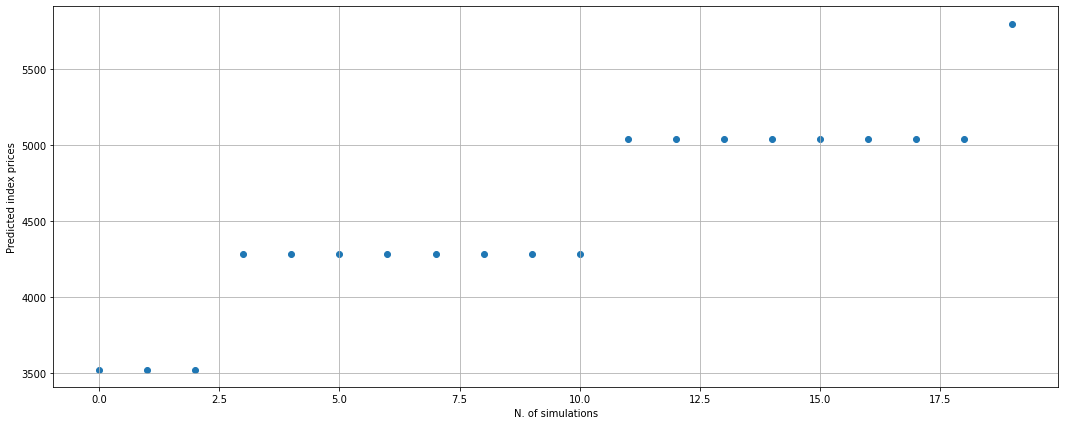

In [ ]:
test = list(enumerate(sorted(S_t.tolist())))
list(zip(*test))
plt.scatter(*zip(*test))
plt.xlabel('N. of simulations')
plt.ylabel('Predicted index prices')
plt.rcParams["figure.figsize"] = pltsize
plt.grid(True)
plt.show()

DESCRIPTION

The plotted results form the stock price simulation depend on the values of two random values Z_1 and Y_t which in turn influence randomly the final stock price; however, the index values still fall into a reasonable range, not far distant from the average

# **Options**

In [ ]:
import scipy
from scipy import stats
import math
from math import log
from math import sqrt
from math import exp

class option():
    '''
    Class for options in BSM model.
    Attributes
    ==========
    S0 : float
    initial stock/index level

    K : float
    strike price

    T : float
    maturity (in year fractions)

    t : float
    Time at S_t

    r : float
    constant risk-free short rate
    
    sigma : float
    Stock volatility
    '''

    def __init__(self, S_0, K, T, t, r, sigma):
      self.S_0 = float(S_0)
      self.K = float(K)
      self.T = float(T)
      self.t = float(t)
      self.r = float(r)
      self.sigma = float(sigma)

    def call_value(self):
        #Returns option value.
      d1 = ((log(self.S_0 / self.K) + (self.r + 0.5 * self.sigma ** 2) * self.T)
        / (self.sigma * sqrt(self.T)))
      d2 = ((log(self.S_0 / self.K) + (self.r - 0.5 * self.sigma ** 2) * self.T)
        / (self.sigma * sqrt(self.T)))
    
      value = (self.S_0 * stats.norm.cdf(d1, 0.0, 1.0)
        - self.K * exp(-self.r * self.T) * stats.norm.cdf(d2, 0.0, 1.0))
      return value

    # Black Scholes Merton European put option value by using put call parity
    def put_value(self):
      put_value = self.call_value() - S_t[0] + math.exp(-self.r * (self.T-self.t)) * self.K 
      return put_value


Modeling a vanilla option with the class, using the first price of the array of predicted prices S_t of the previous model

In [ ]:
# Assigning the values to variables
K = S_t[0] + 200
t = 0
T = 1
r = 0.05
sigma = 0.2

# Computing the value of call vanilla option using the "option" class
o = option(S_t[0], K, T, t, r_j, sigma)
# type(option)
call_value = o.call_value()
call_value

586.0479186782368

In [ ]:
# Computing the value of put vanilla option using the "option" class
put_value = o.put_value()
put_value

151.44567948654503

##Vanilla call option graph

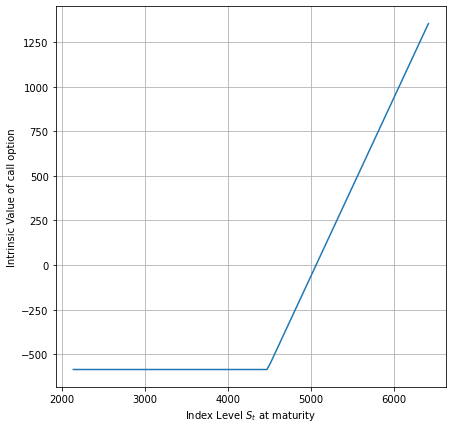

In [ ]:
# Linspace (start,stop, Returns num (100) evenly spaced samples, calculated over the interval [start, stop].)
S = np.linspace (S_t[0] - S_t[0]/2, S_t[0] + S_t[0]/2, 100)
C = np.maximum(S-K,0) - call_value

plt.figure(figsize = (7,7))
plt.plot(S,C)
plt.xlabel('Index Level $S_t$ at maturity')
plt.ylabel('Intrinsic Value of call option')
plt.grid(True)

##Vanilla put option graph

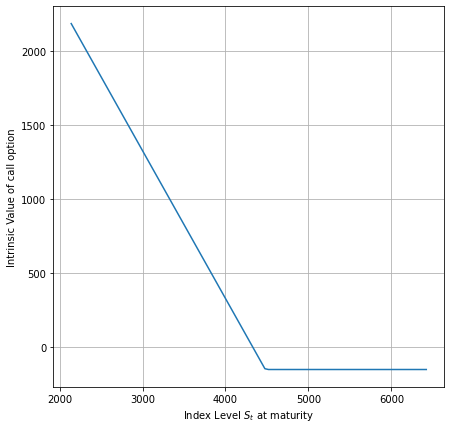

In [ ]:
S = np.linspace (S_t[0] - S_t[0]/2, S_t[0] + S_t[0]/2, 100)
C = np.maximum(K-S,0) - put_value

plt.figure(figsize = (7,7))
plt.plot(S,C)
plt.xlabel('Index Level $S_t$ at maturity')
plt.ylabel('Intrinsic Value of call option')
plt.grid(True)

##Plot vanilla call option present value by change in K 

<Figure size 1296x504 with 0 Axes>

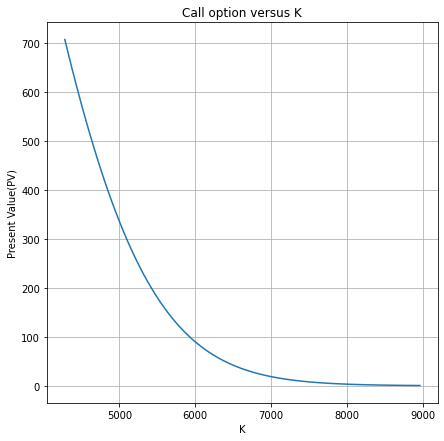

In [ ]:
def plotpv(x, y, xlabel, OptionType):
  plt.figure()
  plt.figure(figsize = (7,7)) 
  plt.plot(x,y)
  plt.grid(True)
  plt.xlabel(xlabel)
  plt.ylabel('Present Value(PV)')
  plt.title(OptionType + ' option versus ' + xlabel)

points = 100 # points is used in np.linspace function below
klist = np.linspace(S_t[0], K + K, points)
vlist = [option(S_t[0], K, T, t, r_j, sigma).call_value() for K in klist] # ensure vlist is an array
plotpv(klist, vlist, 'K', 'Call')

##Plot vanilla put option present value by change in K 

<Figure size 1296x504 with 0 Axes>

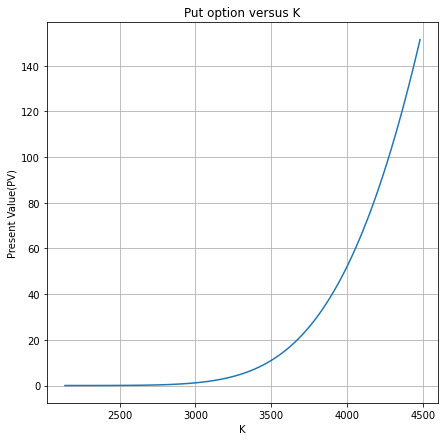

In [ ]:
points = 100 # points is used in np.linspace function below
klist = np.linspace(S_t[0] - S_t[0]/2, K, points)
vlist = [option(S_t[0], K, T, t, r_j, sigma).put_value() for K in klist] # ensure vlist is an array
plotpv(klist, vlist, 'K', 'Put')

# **Extra: Forecasting with Prophet**

In [ ]:
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot

##**STOXX**

Filtering and naming the stoxx columns in the `['ds', 'y']` format as requested by prophet

In [ ]:
forecast_sx5p = stoxx
forecast_sx5p.reset_index(level = 0, inplace = True)
forecast_sx5p = forecast_sx5p[['Date', 'SX5E']]
forecast_sx5p.columns = ['ds', 'y']

prophet = Prophet()
prophet.fit(forecast_sx5p)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


###Forecasting the index prices

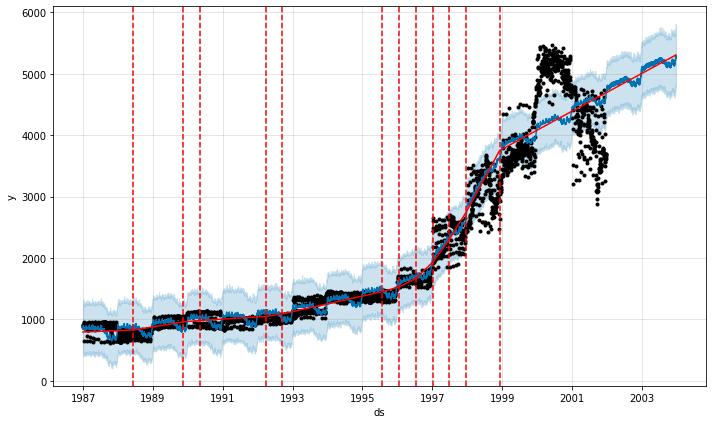

In [ ]:
future = prophet.make_future_dataframe(periods = 365*2)
forecast = prophet.predict(future)
fig = prophet.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), prophet, forecast)

###Extra plots:

- 1st: Trend per year
- 2nd: Average change per day of the week
- 3rd: Average change per month

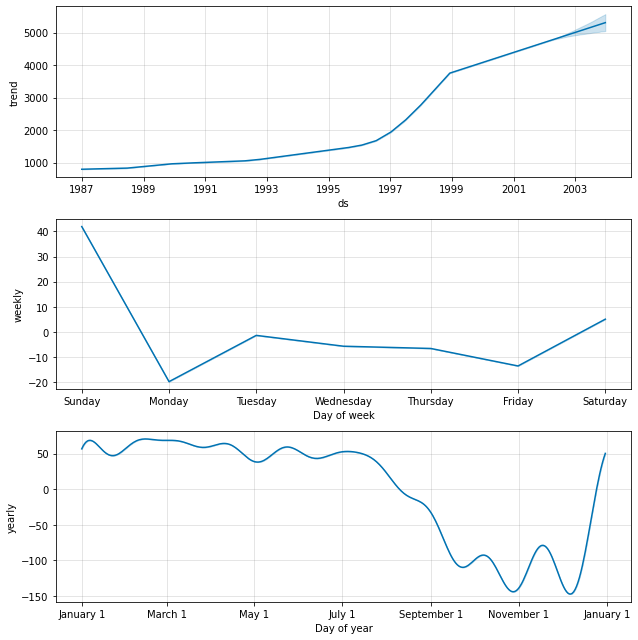

In [ ]:
fig = prophet.plot_components(forecast)

##**VSTOXX**

Filtering and naming the vstoxx columns in the `['ds', 'y']` format as requested by prophet

In [ ]:
forecast_v2tx = vstoxx
forecast_v2tx.reset_index(level = 0, inplace = True)
forecast_v2tx = forecast_v2tx[['Date', 'V2TX']]
forecast_v2tx.columns = ['ds', 'y']
prophet = Prophet()
prophet.fit(forecast_v2tx)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


### Forecasting the volatilities

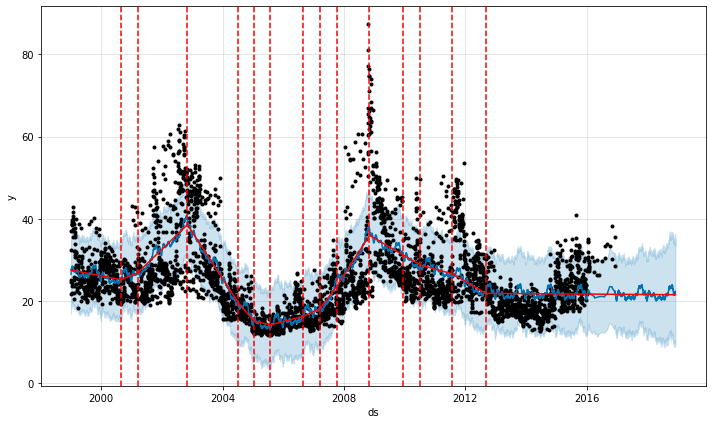

In [ ]:
future = prophet.make_future_dataframe(periods = 365*2)
forecast = prophet.predict(future)
fig = prophet.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), prophet, forecast)

###Extra plots:

- 1st: Trend per year
- 2nd: Average change per day of the week
- 3rd: Average change per month

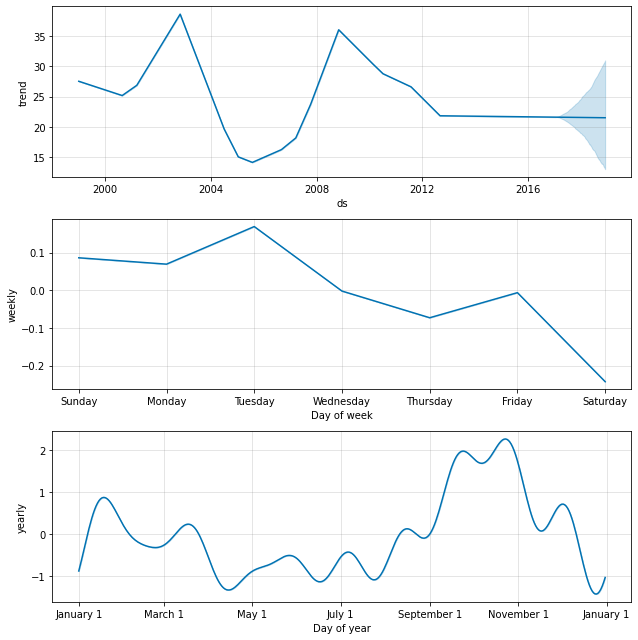

In [ ]:
fig = prophet.plot_components(forecast)